# Stochastic Processes Assignment 2 Bianco Giovanni

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

## Part 2


In [50]:
state_space = [1, 2, 3, 4, 5]

#initializing a 5x5 matrix filled with zeros
P = np.zeros([5, 5])

# creating a matrix such that the entry is 1 when there is an arrow.
# I am going to then normalize the rows so that they all sum to 1 and the probabilities are equally distributed between the arrow for each starting node
P[0, 3] = 1
P[0, 2] = 1
P[0, 1] = 1


P[2, 0] = 1

P[1, 2] = 1

P[3, 2] = 1
P[3, 4] = 1

P[4, 3] = 1

# normalize the rows
P = P / P.sum(axis=1, keepdims=True)
print(P)


[[0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         1.         0.         0.        ]
 [1.         0.         0.         0.         0.        ]
 [0.         0.         0.5        0.         0.5       ]
 [0.         0.         0.         1.         0.        ]]


It does meet the assumptions of the convergence theroem

## Eigenvector method

In [51]:
import numpy as np  # Import NumPy for matrix operations

# Given: Transition matrix P of a Markov chain
# Finding the stationary distribution (π)

# Construct the system: (P^T - I) * π = 0
A = P.T - np.eye(P.shape[0])  # Compute (P^T - I), where I is the identity matrix

# Replace the last row with the normalization constraint: sum(π) = 1
#This equation is not added but put as a replace as the last row would be linear dependent from the others (given the sum of probabilities in each column is 1 and would cause infinitely many solutions to the systems)
A[-1] = np.ones(P.shape[0])  # Set the last row to [1, 1, ..., 1] to enforce sum(π) = 1

# Right-hand side vector b: [0, 0, ..., 1] (for normalization constraint)
b = np.zeros(P.shape[0])  # Initialize a zero vector
b[-1] = 1  # Set the last element to 1 to enforce sum(π) = 1

# Solve the linear system A * π = b to find the stationary distribution
pi = np.linalg.solve(A, b)  # Uses Gaussian elimination or LU decomposition internally

# Print the computed stationary distribution
print("Stationary Distribution (Invariant Distribution):")
print(pi)  # Output the final result

Stationary Distribution (Invariant Distribution):
[0.3 0.1 0.3 0.2 0.1]


# Limiting distribution method

starting from 1

In [52]:
#given X_0 =1 I take the first vector as 
begin=np.zeros(5)
begin[0]=1
# this i am in state 1 with probability 1 (as I am starting from there)

#now i multiply it my P^t which is the transition matrix at time t (set as 1000)
t = 1000  # Large t
P_t = np.linalg.matrix_power(P, t)  # Compute P^t
X_t_dist = begin @ P_t  # Compute the probability distribution at time t

print("Distribution of X_t after t =", t)
print(X_t_dist)

Distribution of X_t after t = 1000
[0.3 0.1 0.3 0.2 0.1]


starting from 5

In [53]:
#starting from 5
#given X_0 =1 we take the first vector as 
begin=np.zeros(5)
begin[4]=1
# now i apply p and see how it evolves over time

t = 1000  # Large t
P_t = np.linalg.matrix_power(P, t)  # Compute P^t
X_t_dist = begin @ P_t  # Compute the probability distribution at time t

print("Distribution of X_t after t =", t)
print(X_t_dist)

Distribution of X_t after t = 1000
[0.3 0.1 0.3 0.2 0.1]


## Asymptotic distribution method

In [54]:
#defining functions to simulate, rank and plot

def simulate (start=1,P=P,N=5,T=1000):
    state=start-1 #converting to 0 indexed python notation
    states_realised = {state: 0 for state in range (1,N+1)}

    for t in range(T):
        states_realised[state+1]+=1 # Store the realized state (convert back to 1-based indexing)
        probs = P[state, :]  # Get transition probabilities
        next_state = np.random.choice(range(N), p=probs)  # Choose next state based on probabilities
        state = next_state
    return states_realised  
                    
#rank the states
def rank_states(states_realised):
    ranking = []
    realisations = states_realised.copy()  # Make a copy to avoid modifying the original dictionary

    while len(realisations) > 0:
        max_key = max(realisations, key=realisations.get)  # Find key with max value
        ranking.append(max_key)  # Store in ranking
        realisations.pop(max_key)  # Remove the key from the temporary dictionary
    return ranking

def display_results(state_space,frequencies):
    plt.figure(figsize=(8, 5))
    plt.bar(state_space, frequencies)
    plt.xlabel("State")
    plt.ylabel("Frequency")
    plt.title("Empirical Distribution from Simulation")
    plt.show()
    

starting from 1

State 1: frequency 0.3003
State 3: frequency 0.3003
State 4: frequency 0.2000
State 5: frequency 0.1001
State 2: frequency 0.0993


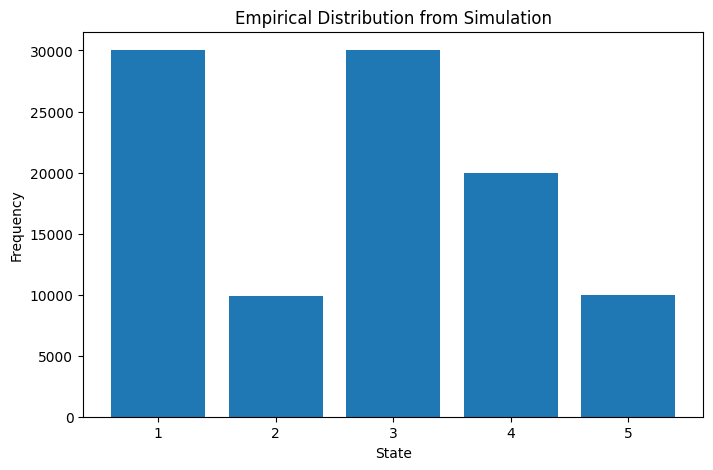

In [55]:
T=100000
N=P.shape[0]
states_realised =simulate(start=1, P=P,N=N,T=T)
frequencies=[states_realised[state] for state in range(1,N+1)]
ranking = rank_states(states_realised)
for state in ranking:
    print(f"State {state}: frequency {states_realised[state]/sum(states_realised.values()):.4f}")
display_results(state_space=state_space,frequencies=frequencies)

starting from 5

State 3: frequency 0.3009
State 1: frequency 0.3009
State 4: frequency 0.1992
State 2: frequency 0.1004
State 5: frequency 0.0986


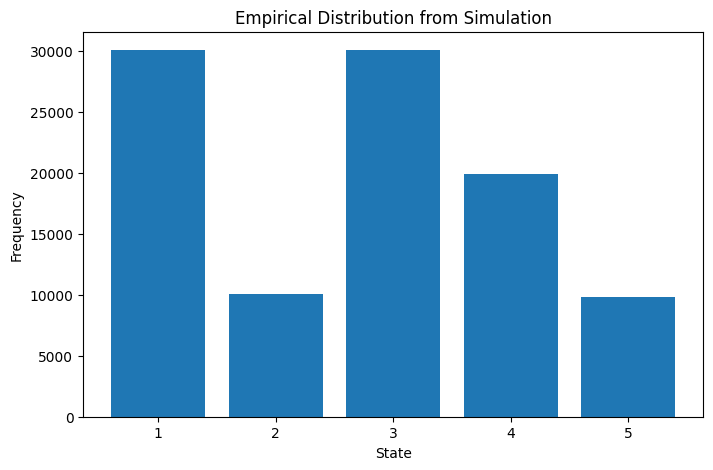

In [56]:
T=100000
N=P.shape[0]
states_realised =simulate(start=5, P=P,N=N,T=T)
frequencies=[states_realised[state] for state in range(1,N+1)]
ranking = rank_states(states_realised)
for state in ranking:
    print(f"State {state}: frequency {states_realised[state]/sum(states_realised.values()):.4f}")
display_results(state_space=state_space,frequencies=frequencies)

## Part 3

load dataset

In [57]:
# Load CSV into a pandas DataFrame
df = pd.read_csv('net.csv')

# Convert to NumPy array
data = df.to_numpy() 
#normalizing rows
row_sums = data.sum(axis=1, keepdims=True)  # Sum along rows
P= data / row_sums  # Element-wise division

print(P)

[[0.  1.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0.5]
 [0.  0.  0.  ... 0.  0.  0. ]]


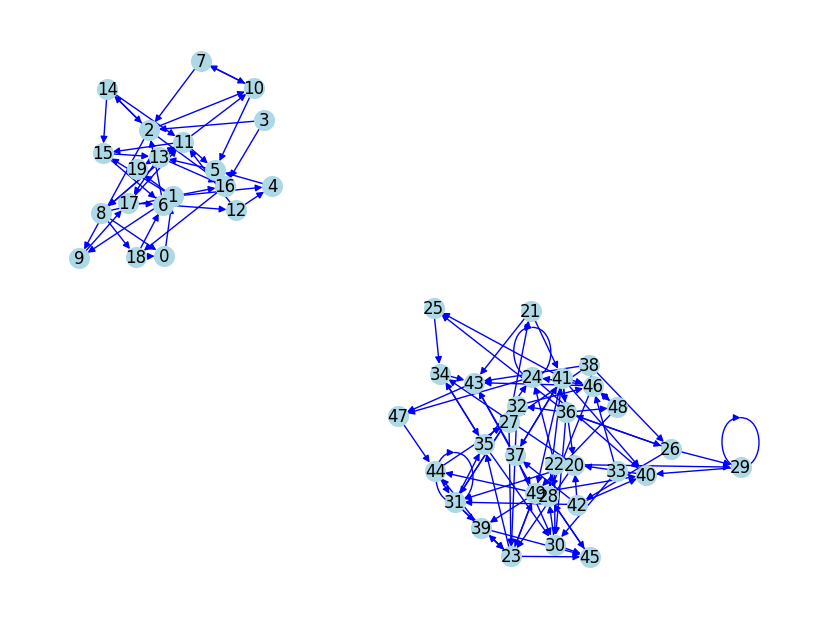

In [58]:
G = nx.from_numpy_array(P, create_using=nx.DiGraph)

# Draw the graph 
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Spring layout for better spacing
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='blue', 
        node_size=200, arrows=True)

plt.show()

It is possibe to notice there are 2 connected components. This means the transitino probability matrix will not be reducible (for example it is impossible to go to node 1 starting from node 50)

### Simulation

starting from 1

State 12: frequency 0.0966
State 14: frequency 0.0919
State 7: frequency 0.0916
State 19: frequency 0.0770
State 6: frequency 0.0741
State 17: frequency 0.0726
State 18: frequency 0.0705
State 3: frequency 0.0638
State 2: frequency 0.0480
State 11: frequency 0.0458
State 13: frequency 0.0447
State 1: frequency 0.0432
State 16: frequency 0.0356
State 5: frequency 0.0322
State 20: frequency 0.0289
State 10: frequency 0.0255
State 8: frequency 0.0228
State 9: frequency 0.0190
State 15: frequency 0.0160
State 4: frequency 0.0000
State 21: frequency 0.0000
State 22: frequency 0.0000
State 23: frequency 0.0000
State 24: frequency 0.0000
State 25: frequency 0.0000
State 26: frequency 0.0000
State 27: frequency 0.0000
State 28: frequency 0.0000
State 29: frequency 0.0000
State 30: frequency 0.0000
State 31: frequency 0.0000
State 32: frequency 0.0000
State 33: frequency 0.0000
State 34: frequency 0.0000
State 35: frequency 0.0000
State 36: frequency 0.0000
State 37: frequency 0.0000
State 38: 

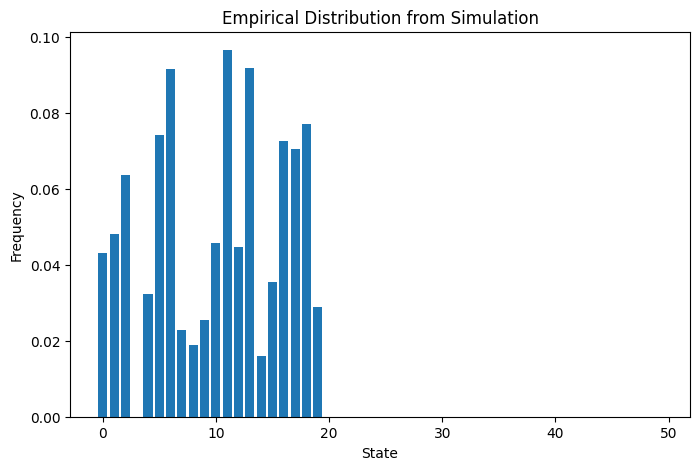

In [59]:
T=100000 #number of iterations for the simulation
N=P.shape[0] #how many nodes
state_space = np.arange(0,N)# Define state labels
states_realised =simulate(start=1, P=P,N=N,T=T)
frequencies=[states_realised[state]/sum(states_realised.values()) for state in range(1,N+1)]
ranking = rank_states(states_realised)
for state in ranking:
    print(f"State {state}: frequency {states_realised[state]/sum(states_realised.values()):.4f}")
display_results(state_space=state_space,frequencies=frequencies)

starting from 50

State 29: frequency 0.0925
State 24: frequency 0.0770
State 46: frequency 0.0739
State 45: frequency 0.0711
State 32: frequency 0.0699
State 21: frequency 0.0526
State 36: frequency 0.0509
State 41: frequency 0.0477
State 40: frequency 0.0477
State 25: frequency 0.0461
State 50: frequency 0.0430
State 28: frequency 0.0375
State 35: frequency 0.0361
State 42: frequency 0.0337
State 44: frequency 0.0329
State 48: frequency 0.0323
State 31: frequency 0.0308
State 30: frequency 0.0272
State 23: frequency 0.0223
State 22: frequency 0.0186
State 33: frequency 0.0159
State 47: frequency 0.0148
State 26: frequency 0.0058
State 37: frequency 0.0055
State 38: frequency 0.0048
State 49: frequency 0.0042
State 39: frequency 0.0028
State 27: frequency 0.0018
State 43: frequency 0.0006
State 1: frequency 0.0000
State 2: frequency 0.0000
State 3: frequency 0.0000
State 4: frequency 0.0000
State 5: frequency 0.0000
State 6: frequency 0.0000
State 7: frequency 0.0000
State 8: frequency 0.0000
State 9: 

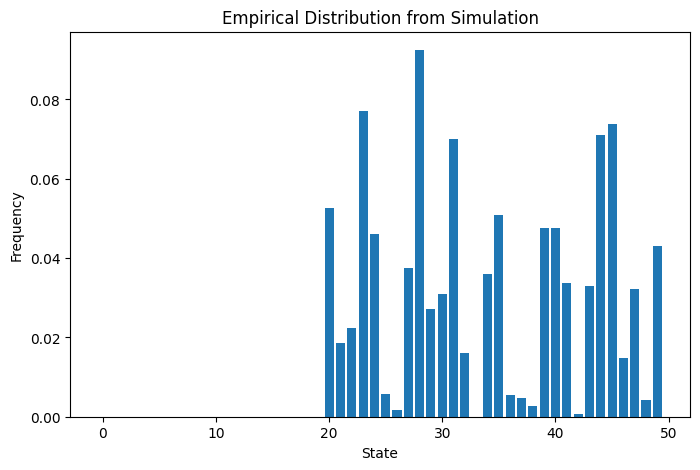

In [60]:
T=100000 #number of iterations for the simulation
N=P.shape[0] #how many nodes
state_space = np.arange(0,N)# Define state labels
states_realised =simulate(start=50, P=P,N=N,T=T)
frequencies=[states_realised[state]/sum(states_realised.values())  for state in range(1,N+1)]
ranking = rank_states(states_realised)
for state in ranking:
    print(f"State {state}: frequency {states_realised[state]/sum(states_realised.values()):.4f}")
display_results(state_space=state_space,frequencies=frequencies)

# Modified page rank

In [61]:
alpha=0.95
Pstar=alpha* P + (1-alpha)*1/50
print(Pstar)

[[0.001 0.951 0.001 ... 0.001 0.001 0.001]
 [0.001 0.001 0.001 ... 0.001 0.001 0.001]
 [0.001 0.001 0.001 ... 0.001 0.001 0.001]
 ...
 [0.001 0.001 0.001 ... 0.001 0.001 0.001]
 [0.001 0.001 0.001 ... 0.001 0.001 0.476]
 [0.001 0.001 0.001 ... 0.001 0.001 0.001]]


#### simlulate starting from 1

State 29: frequency 0.0503
State 24: frequency 0.0430
State 46: frequency 0.0405
State 32: frequency 0.0402
State 12: frequency 0.0396
State 45: frequency 0.0389
State 14: frequency 0.0372
State 7: frequency 0.0360
State 21: frequency 0.0318
State 19: frequency 0.0311
State 6: frequency 0.0309
State 17: frequency 0.0297
State 41: frequency 0.0293
State 18: frequency 0.0293
State 36: frequency 0.0287
State 40: frequency 0.0270
State 25: frequency 0.0263
State 3: frequency 0.0258
State 50: frequency 0.0255
State 35: frequency 0.0212
State 2: frequency 0.0205
State 28: frequency 0.0203
State 44: frequency 0.0199
State 11: frequency 0.0192
State 48: frequency 0.0191
State 42: frequency 0.0186
State 30: frequency 0.0184
State 1: frequency 0.0184
State 31: frequency 0.0181
State 13: frequency 0.0180
State 16: frequency 0.0144
State 5: frequency 0.0132
State 23: frequency 0.0130
State 20: frequency 0.0126
State 47: frequency 0.0107
State 10: frequency 0.0106
State 22: frequency 0.0104
State 3

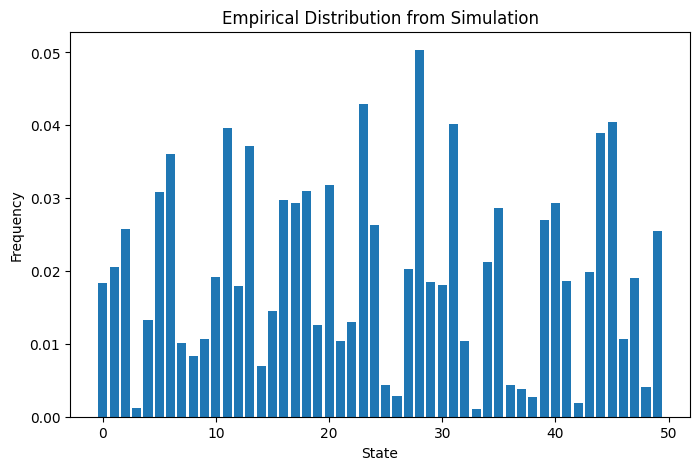

In [62]:
T=100000 #number of iterations for the simulation
N=P.shape[0] #how many nodes
state_space = np.arange(0,N)# Define state labels
states_realised =simulate(start=1, P=Pstar,N=N,T=T)
frequencies=[states_realised[state]/sum(states_realised.values())  for state in range(1,N+1)]
ranking = rank_states(states_realised)
for state in ranking:
    print(f"State {state}: frequency {states_realised[state]/sum(states_realised.values()):.4f}")
display_results(state_space=state_space,frequencies=frequencies)

### simulate starting from 50

State 29: frequency 0.0507
State 24: frequency 0.0444
State 46: frequency 0.0409
State 32: frequency 0.0408
State 45: frequency 0.0400
State 12: frequency 0.0382
State 14: frequency 0.0361
State 7: frequency 0.0348
State 21: frequency 0.0328
State 36: frequency 0.0305
State 41: frequency 0.0303
State 19: frequency 0.0299
State 6: frequency 0.0298
State 17: frequency 0.0283
State 18: frequency 0.0279
State 40: frequency 0.0273
State 25: frequency 0.0271
State 50: frequency 0.0265
State 3: frequency 0.0249
State 35: frequency 0.0232
State 44: frequency 0.0208
State 28: frequency 0.0205
State 2: frequency 0.0196
State 48: frequency 0.0192
State 11: frequency 0.0191
State 42: frequency 0.0191
State 30: frequency 0.0190
State 31: frequency 0.0186
State 13: frequency 0.0177
State 1: frequency 0.0174
State 16: frequency 0.0144
State 23: frequency 0.0130
State 5: frequency 0.0130
State 20: frequency 0.0115
State 22: frequency 0.0111
State 47: frequency 0.0103
State 33: frequency 0.0102
State 1

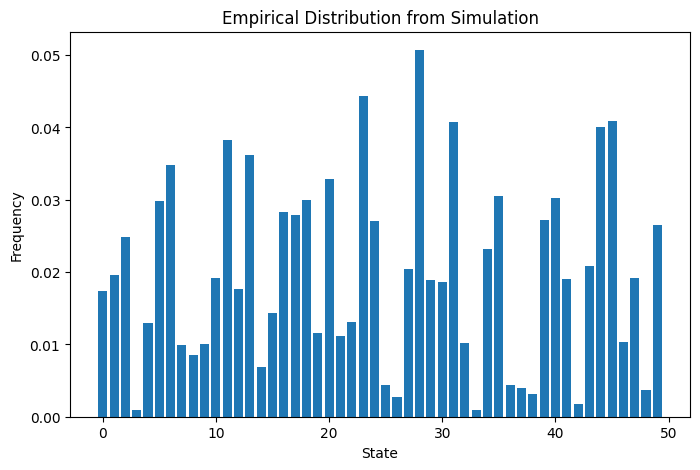

In [63]:
T=100000 #number of iterations for the simulation
N=P.shape[0] #how many nodes
state_space = np.arange(0,N)# Define state labels
states_realised =simulate(start=50, P=Pstar,N=N,T=T)
frequencies=[states_realised[state]/sum(states_realised.values())  for state in range(1,N+1)]
ranking = rank_states(states_realised)
for state in ranking:
    print(f"State {state}: frequency {states_realised[state]/sum(states_realised.values()):.4f}")
display_results(state_space=state_space,frequencies=frequencies)

the rankings match independently from starting point

#### Showing convergence of asymptotic probabilities

0: 0.01626 
10: 0.0184 
25: 0.0048 
40: 0.02914 


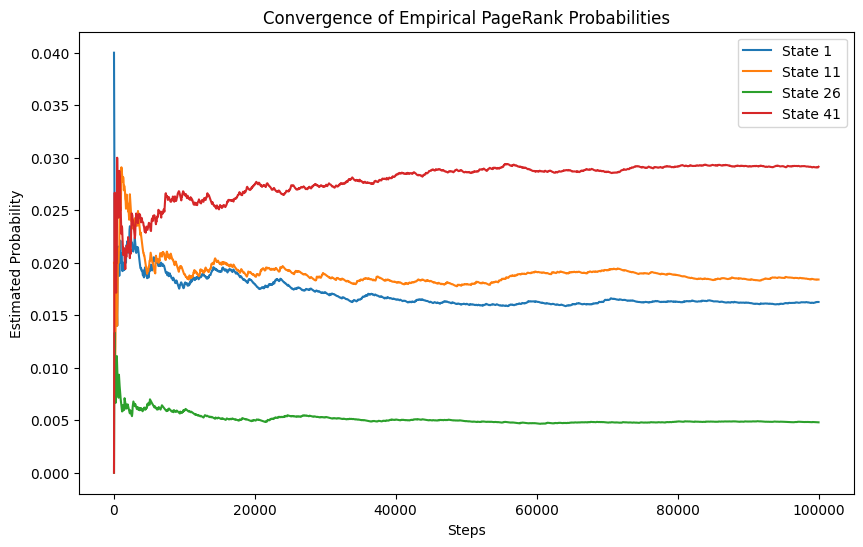

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define state space
state_space = np.arange(50)  # 50 states (0-based index)

# Initialize
state = 0  # Start from node 1 (index 0)
T = 100000  # Number of steps
tracking_interval = 50  # Track probabilities every 50 steps
tracked_states = [0, 10, 25, 40]  # Choose some states to track their probabilities

# Store empirical distribution over time
visit_counts = np.zeros(50)  # Track how often each state is visited
distribution_history = {s: [] for s in tracked_states}  # Track specific states

# Simulate the Markov process
for t in range(1, T + 1):
    visit_counts[state] += 1  # Count visit
    probs = Pstar[state, :]  # Get transition probabilities
    state = np.random.choice(state_space, p=probs)  # Choose next state

    # Store probability estimates at intervals
    if t % tracking_interval == 0:
        empirical_distribution = visit_counts / t  # Normalize to get probabilities
        for s in tracked_states:
            distribution_history[s].append(empirical_distribution[s])

# Plot probability evolution over time
plt.figure(figsize=(10, 6))
for s in tracked_states:
    print(f'{s}: {distribution_history[s][-1]} ')
    plt.plot(range(tracking_interval, T + 1, tracking_interval), distribution_history[s], label=f"State {s + 1}") #range starts from 50, arrives till 1000 with steps of 50

plt.xlabel("Steps")
plt.ylabel("Estimated Probability")
plt.title("Convergence of Empirical PageRank Probabilities")
plt.legend()
plt.show()

0: 0.01689 
10: 0.01854 
25: 0.00456 
40: 0.02915 


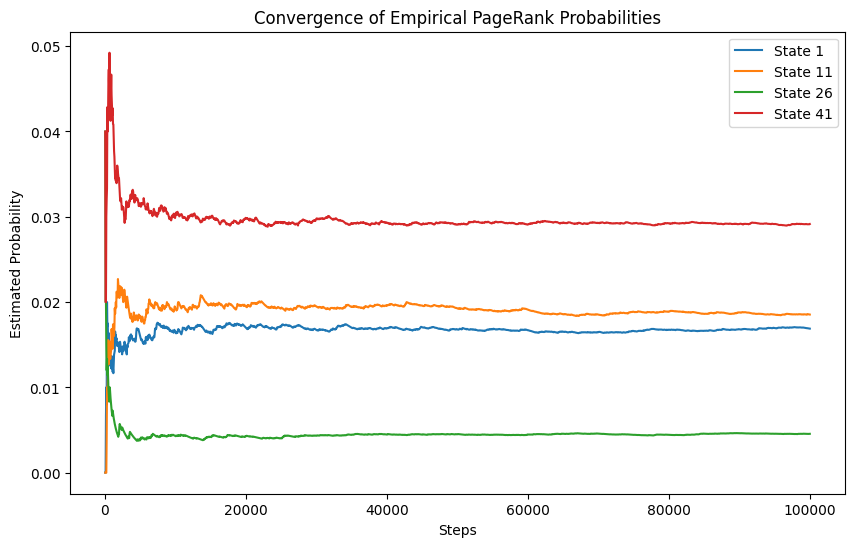

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Define state space
state_space = np.arange(50)  # 50 states (0-based index)

# Initialize
state = 49  # Start from node 50 (index 49)
T = 100000  # Number of steps
tracking_interval = 50  # Track probabilities every 50 steps
tracked_states = [0, 10, 25, 40]  # Choose some states to track their probabilities

# Store empirical distribution over time
visit_counts = np.zeros(50)  # Track how often each state is visited
distribution_history = {s: [] for s in tracked_states}  # Track specific states

# Simulate the Markov process
for t in range(1, T + 1):
    visit_counts[state] += 1  # Count visit
    probs = Pstar[state, :]  # Get transition probabilities
    state = np.random.choice(state_space, p=probs)  # Choose next state

    # Store probability estimates at intervals
    if t % tracking_interval == 0:
        empirical_distribution = visit_counts / t  # Normalize to get probabilities
        for s in tracked_states:
            distribution_history[s].append(empirical_distribution[s])

# Plot probability evolution over time
plt.figure(figsize=(10, 6))
for s in tracked_states:
    print(f'{s}: {distribution_history[s][-1]} ')
    plt.plot(range(tracking_interval, T + 1, tracking_interval), distribution_history[s], label=f"State {s + 1}") #range starts from 50, arrives till 1000 with steps of 50

plt.xlabel("Steps")
plt.ylabel("Estimated Probability")
plt.title("Convergence of Empirical PageRank Probabilities")
plt.legend()
plt.show()